In [39]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [40]:
import xarray as xr
import xrft
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import cmocean

%matplotlib inline
plt.rcParams["font.size"] = 14

In [23]:
root_dir = '/home/gkara/Documents/for-tide_paper/'
#
gridT = !ls /home/gkara/Documents/for-tide_paper/ref/*1h_gridT*
#
_gridT = !ls /home/gkara/Documents/for-tide_paper/exp1/*1h_gridT*

# load hourly files 
dsT = xr.open_mfdataset(gridT, combine='by_coords')
dsT_ = xr.open_mfdataset(_gridT, combine='by_coords')

In [30]:
#load 2D files 
import glob
root_dir = '/home/gkara/Documents/for-tide_paper/'
ds2D = xr.open_mfdataset(glob.glob(root_dir + 'ref/' + 'BISCAY-T60_1d_grid2D_ssh-ib_20110706-20120629.nc'), combine='by_coords')
ds2D_ = xr.open_mfdataset(glob.glob(root_dir + 'exp1/' + 'BISCAY-T60_1d_grid2D_ssh-ib_20110706-20120629.nc'), combine='by_coords')

In [9]:
# select data
# abyssal plain
dssh_ab = dsT.isel(x=88,y=230,time_counter=slice(0,2040))
dssh_ab_ = dsT_.isel(x=88,y=230,time_counter=slice(0,2040))
# armorican shelf
dssh_ar = dsT.isel(x=312,y=278,time_counter=slice(0,2040))
dssh_ar_ = dsT_.isel(x=312,y=278,time_counter=slice(0,2040))
# english channel
dssh_ec = dsT.isel(x=286,y=470,time_counter=slice(0,2040))
dssh_ec_ = dsT_.isel(x=286,y=470,time_counter=slice(0,2040))

In [10]:
# save data
np.savez('../data/SSH_freq_spectra.npz', \
         abbysal = dssh_ab.sossheig.values, \
         abbysal_ = dssh_ab_.sossheig.values, \
         armorican = dssh_ar.sossheig.values, \
         armorican_ = dssh_ar_.sossheig.values, \
         channel = dssh_ec.sossheig.values, \
         channel_ = dssh_ec_.sossheig.values)
np.savez('../data/SSH_time_counter.npz',time = dsT.time_counter.values)

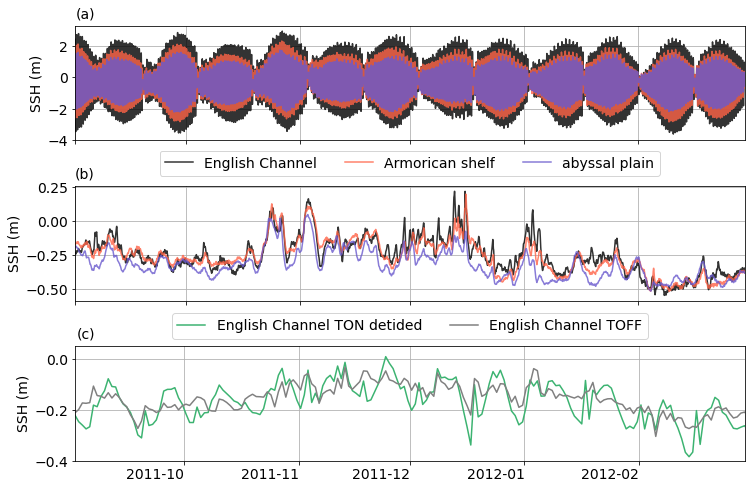

In [32]:
# some colors
c1 = 'slateblue'
c2 = 'tomato'
c3 = 'k'
c4 = 'indigo'
#

## load data 
data = np.load('../data/SSH_freq_spectra.npz')
time = np.load('../data/SSH_time_counter.npz')
#

fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (12,8))
plt.subplots_adjust(hspace=0.4)
axes[0].plot(time['time'][1365:6481], data['channel'][1365:6481], color=c3, label='English Channel', alpha=0.8)
axes[0].plot(time['time'][1365:6481], data['armorican'][1365:6481], color=c2, label='Armorican shelf', alpha=0.8)
axes[0].plot(time['time'][1365:6481], data['abbysal'][1365:6481], color=c1, label='abyssal plain', alpha=0.8)
axes[0].legend(ncol=3, loc='center', bbox_to_anchor=(0.5, -0.2))

axes[0].set_xticklabels('')

axes[1].plot(time['time'][1365:6481], data['channel_'][1365:6481], color=c3, label='English Channel', alpha=0.8)
axes[1].plot(time['time'][1365:6481], data['armorican_'][1365:6481], color=c2, label='Armorican shelf', alpha=0.8)
axes[1].plot(time['time'][1365:6481], data['abbysal_'][1365:6481], color=c1, label='abyssal plain', alpha=0.8)

ds2D.isel(x=286,y=470).SSH.plot(ax=axes[2], color='mediumseagreen', label='English Channel TON detided')
ds2D_.isel(x=286,y=470).SSH.plot(ax=axes[2], color='gray', label='English Channel TOFF')
axes[2].set_xlabel('')
axes[2].set_xlim(ds2D.sel(time_counter='2011-09-01').time_counter.values, ds2D.sel(time_counter='2012-02-29').time_counter.values)
plt.xticks(rotation=0)
axes[2].set_ylim(-0.4, 0.05)
axes[2].legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.35))

idx = ['(a)', '(b)', '(c)']
for i, ax in enumerate(axes.flat):
    ax.set_ylabel('SSH (m)')
    ax.grid()
    if i<2:  
        ax.set_xlim(time['time'][1365], time['time'][5735])    #time['time'][1365], time['time'][5737])
        ax.set_xticklabels('')    
    ax.annotate(idx[i], xy=(0, 1), xycoords='axes fraction', fontsize=14,
        xytext=(20, 5), textcoords='offset points',
        ha='right', va='bottom')

#save figure
fig.savefig('../_plots/figure8.png',dpi=300,bbox_inches='tight')

### figure 9

In [ ]:
%reset

In [3]:
import glob
#
root_dir = '/home/gkara/Documents/for-tide_paper/'
def _fnames(arch, season):
        
    if season == 'winter':
        fnames = glob.glob(arch + 'BISCAY-T60_1h_gridT_20120[1-3]??-20120[1-3]??.nc') #winter
    elif season == 'summer':
        fnames = glob.glob(arch + 'BISCAY-T60_1h_gridT_20110[7-9]??-20110[7-9]??.nc') #summer
    return fnames

#
dsT_s = xr.open_mfdataset(_fnames(root_dir + 'ref/','summer'), combine='by_coords')
dsT_s_ = xr.open_mfdataset(_fnames(root_dir + 'exp1/', 'summer'), combine='by_coords')
#
dsT_w = xr.open_mfdataset(_fnames(root_dir + 'ref/','winter'), combine='by_coords')
dsT_w_ = xr.open_mfdataset(_fnames(root_dir + 'exp1/', 'winter'), combine='by_coords')

In [5]:
def _sel_region(ds1, ds2, season):
    dssh_ab = ds1.isel(x=88,y=230)
    dssh_ab_ = ds2.isel(x=88,y=230)
    dssh_ar = ds1.isel(x=312,y=278)
    dssh_ar_ = ds2.isel(x=312,y=278)
    dssh_ec = ds1.isel(x=286,y=470)
    dssh_ec_ = ds2.isel(x=286,y=470)
    # save
    np.savez('../data/SSH_freq_spectra_' + season + '.npz', \
         abbysal = dssh_ab.sossheig.values, \
         abbysal_ = dssh_ab_.sossheig.values, \
         armorican = dssh_ar.sossheig.values, \
         armorican_ = dssh_ar_.sossheig.values, \
         channel = dssh_ec.sossheig.values, \
         channel_ = dssh_ec_.sossheig.values)
    return
#####
_sel_region(dsT_s, dsT_s_, 'summer')
_sel_region(dsT_w, dsT_w_, 'winter')

In [38]:
def _spectra_plot(ax, _data):
    # tidal constituents
    constituents = [('K2', 11.96723606), ('M2', 12.4206012), ('N2', 12.65834751), ('S2', 12.),\
                    ('K1', 23.93447213), ('O1', 25.81933871), ('Q1', 26.86835), ('P1', 24.06588766),\
                    ('Mf', 327.8599387), ('Mm', 661.3111655),\
                    ('M4', 6.2103006)]
    ##############################
    data = np.load(_data)
    fs=24
    ### calculate spectra
    f1, Ps1_TON = signal.welch(data['abbysal'], fs, nperseg=720)
    f1, Ps1_TOFF = signal.welch(data['abbysal_'], fs, nperseg=720)
    #
    f2, Ps2_TON = signal.welch(data['armorican'], fs, nperseg=720)
    f2, Ps2_TOFF = signal.welch(data['armorican_'], fs, nperseg=720)
    #
    f3, Ps3_TON = signal.welch(data['channel'], fs, nperseg=720)
    f3, Ps3_TOFF = signal.welch(data['channel_'], fs, nperseg=720)
    ##############################
    ### make plot
    #
    ax.loglog(f3,Ps3_TON,'-',color=c3,label='English Channel')
    ax.loglog(f3,Ps3_TOFF,'--',color=c3)
    #
    ax.loglog(f2,Ps2_TON,'-',color=c2,label='Armorican shelf')
    ax.loglog(f2,Ps2_TOFF,'--',color=c2)
    #
    ax.loglog(f1,Ps1_TON,'-',color=c1,label='abyssal plain')
    ax.loglog(f1,Ps1_TOFF,'--',color=c1)
    #
    ax.grid()
    kappa = [1.1e-9, 1.01e-8, 3.0e-8, 3.0e-9, 1.1e-9, 1.01e-8, 3.0e-8, 3.0e-9]
    for k,f in enumerate(constituents):
        if k<8:
            ax.text(24./f[1], kappa[k], f[0], size=10)
        else:
            ax.text(24./f[1], 1.1e-9, f[0], size=10)
    #
    ax.set_xlim(0.0333,10)
    ax.set_ylabel('SSH power spectrum (m$^{2}$cpd$^{-1}$)')
    ax.set_xlabel(r'Frequency (cpd)')
    plt.legend(ncol=2, loc=2)

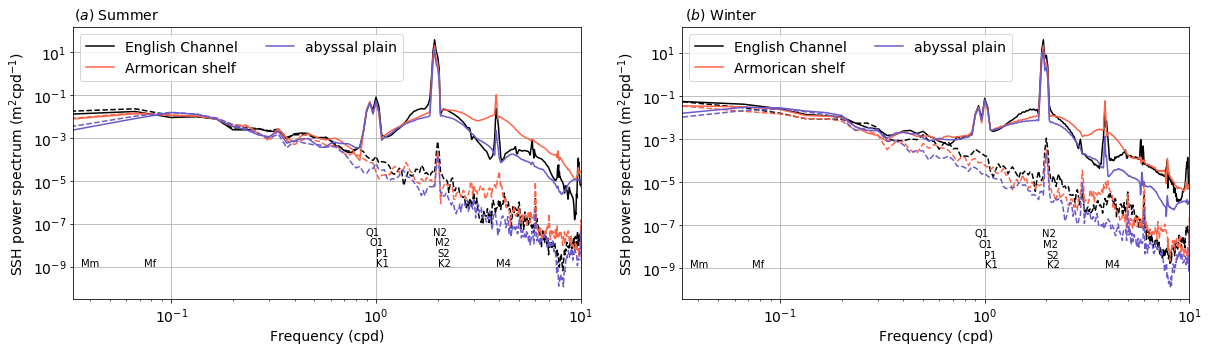

In [37]:
fig = plt.figure(figsize = (20,5))
ax0=plt.subplot(121)
_spectra_plot(ax0,'../data/SSH_freq_spectra_summer.npz')
ax1=plt.subplot(122)
_spectra_plot(ax1,'../data/SSH_freq_spectra_winter.npz')
####
idx = ['$(a)$ ' + 'Summer', '$(b)$ ' + 'Winter']
ax0.annotate(idx[0], xy=(.13, 1), xycoords='axes fraction', fontsize=14,
    xytext=(20, 5), textcoords='offset points',
    ha='right', va='bottom')
ax1.annotate(idx[1], xy=(.11, 1), xycoords='axes fraction', fontsize=14,
    xytext=(20, 5), textcoords='offset points',
    ha='right', va='bottom')
#save figure
fig.savefig('../_plots/figure9.png',dpi=300,bbox_inches='tight')